### Code Task


*   Implement the elbow method to choose the best number of clusters ranging between (1:15) suitable for the provided dataset.
*   Plot the value of the inetria and Davies Bouldin score associated with each k and explain why you choose that k.
*   Use the agglomerative clustering technique.
*   Compare between the result of each of the two models.



# New Section

In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [3]:
# reading the dataset file provided in the lab classroom directory
data = pd.read_csv("/content/Live_20210128.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
data.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace = True)
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [5]:
data.drop(columns = ['status_id', 'status_published'], inplace = True)
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [6]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [7]:
# convert categorical variables to integrs
le = LabelEncoder()

data['status_type'] = le.fit_transform(data['status_type'])

print(data['status_type'].unique())
data.head()

[3 1 0 2]


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [8]:
# Declare feature and target variables
x = data
y = data['status_type']

x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [9]:
ms = MinMaxScaler()

col = x.columns
x = ms.fit_transform(x)

x = pd.DataFrame(x, columns = col)
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [10]:
kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 500, random_state = 10)
kmeans.fit(x)

KMeans(init='random', max_iter=500, n_clusters=2, random_state=10)

In [11]:
# Display teh model's famous attributes
print(kmeans.cluster_centers_)
print(np.unique(kmeans.labels_))
print(kmeans.inertia_)

[[3.28506857e-01 3.90710874e-02 7.54854864e-04 7.53667113e-04
  3.85438884e-02 2.17448568e-03 2.43721364e-03 1.20039760e-03
  2.75348016e-03 1.45313276e-03]
 [9.54921576e-01 6.46330441e-02 2.67028654e-02 2.93171709e-02
  5.71231462e-02 4.71007076e-02 8.18581889e-03 9.65207685e-03
  8.04219428e-03 7.19501847e-03]]
[0 1]
237.7572640441955


In [12]:
sh = silhouette_score(x, kmeans.labels_, metric = 'euclidean')
db = davies_bouldin_score(x, kmeans.labels_)
wcss = kmeans.inertia_


print(sh, db, wcss)


0.7640959333166648 0.39739850431474066 237.7572640441955


# elbow method


In [18]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


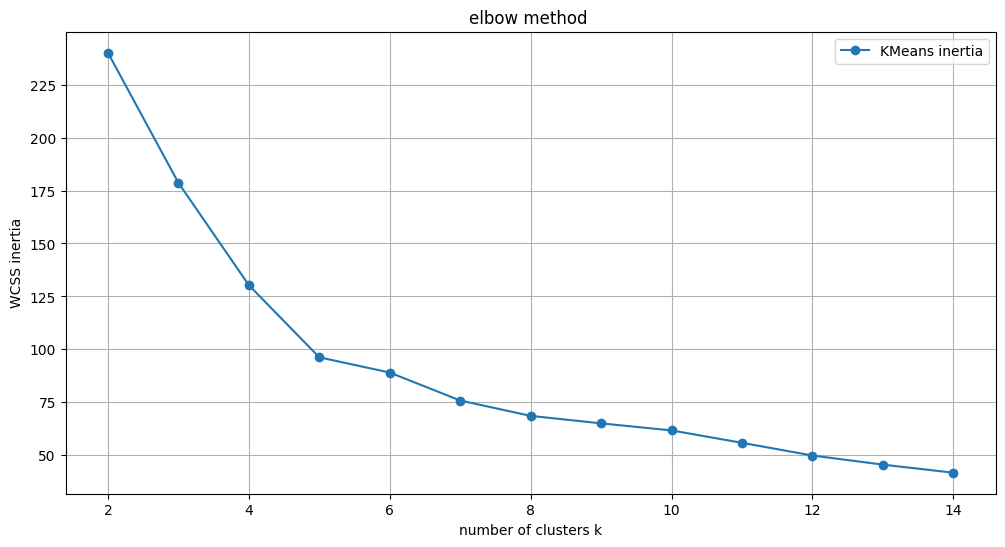

In [49]:
kmeans_inertia = []
kmeans_db = []
agglo_db = []

for k in range(2,15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    kmeans_inertia.append(kmeans.inertia_)
    kmeans_db.append(davies_bouldin_score(x, kmeans.labels_))

    agglo = AgglomerativeClustering(n_clusters=k)
    agglo.fit(x)
    agglo_db.append(davies_bouldin_score(x, agglo.labels_))

clu=range(2,15)
plt.figure(figsize=(12, 6))
plt.plot(clu, kmeans_inertia, marker='o', label='KMeans inertia')
plt.xlabel('number of clusters k')
plt.ylabel('WCSS inertia')
plt.title('elbow method ')
plt.grid()
plt.legend()
plt.show()

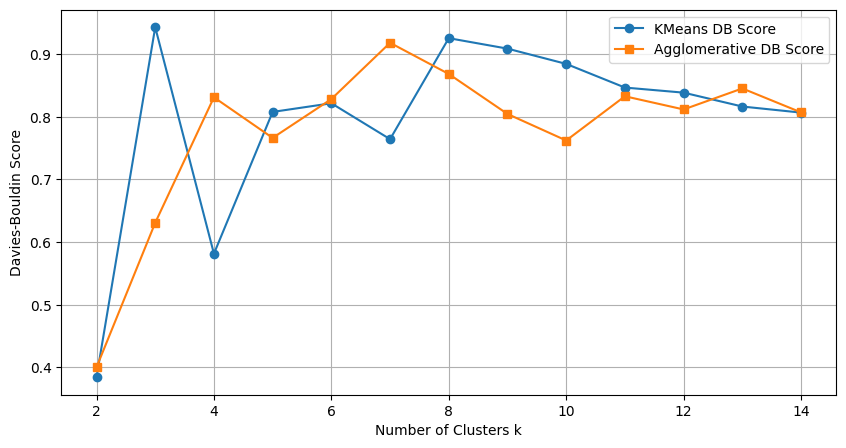

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(clu, kmeans_db, marker='o', label='KMeans DB Score')
plt.plot(clu, agglo_db, marker='s', label='Agglomerative DB Score')
plt.xlabel('Number of Clusters k')
plt.ylabel('Davies-Bouldin Score')
plt.grid()
plt.legend()
plt.show()